In [2]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.shape

(5728, 2)

In [5]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [6]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [7]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

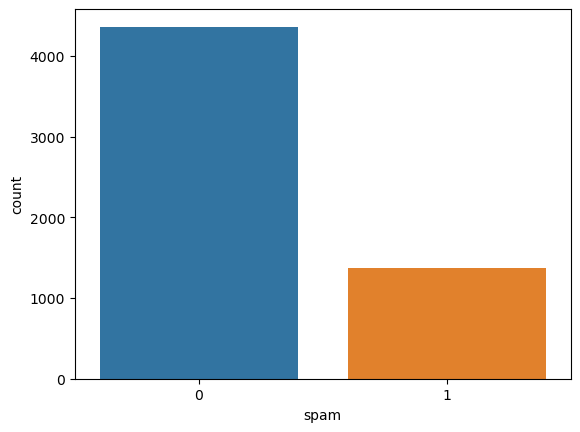

In [8]:
sns.countplot(data['spam'])

In [9]:
data.duplicated().sum()

33

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [13]:
data.shape

(5695, 2)

In [14]:
5728 - 33

5695

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

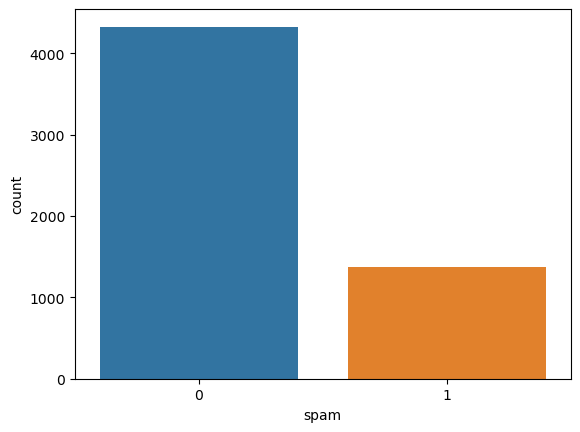

In [15]:
sns.countplot(data['spam'])

In [16]:
data['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

# Separate in X and Y

In [17]:
X = data['text'].values
y = data['spam'].values

In [18]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Train - Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [20]:
X_train.shape

(4556,)

In [21]:
X_test.shape

(1139,)

In [22]:
y_train.shape

(4556,)

In [23]:
y_test.shape

(1139,)

# Preprocessing 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer()


# Training by ML Algorithm

In [26]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is a list of email texts and 'y' is a list of corresponding labels (0 for non-spam, 1 for spam)
# You should replace 'X' and 'y' with your actual data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel is used for simplicity
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, svm_predictions)
report_svm = classification_report(y_test, svm_predictions)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)


SVM Accuracy: 0.9947322212467077
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       0.99      0.99      0.99       296

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



0.9947322212467077
0.8832309043020193
0.990342405618964
0.9929762949956101


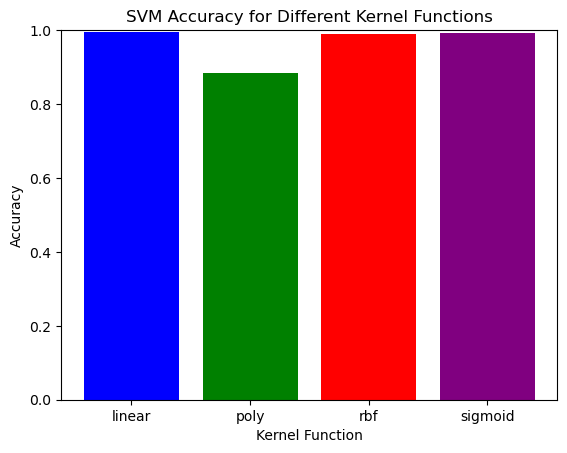

In [39]:
# Initialize lists to store kernel names and corresponding accuracies
kernel_names = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

# Try SVM with different kernel functions
for kernel in kernel_names:
    # Create SVM classifier
    svm_classifier = SVC(kernel=kernel)
    
    # Train the classifier
    svm_classifier.fit(X_train_tfidf, y_train)
    
    # Make predictions on the test set
    y_pred = svm_classifier.predict(X_test_tfidf)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)

# Plot the results
plt.bar(kernel_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('SVM Accuracy for Different Kernel Functions')
plt.xlabel('Kernel Function')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to represent accuracy percentage
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize and train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for simplicity
knn_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test_tfidf)

# Evaluate the k-NN model
accuracy_knn = accuracy_score(y_test, knn_predictions)
report_knn = classification_report(y_test, knn_predictions)

print("k-NN Accuracy:", accuracy_knn)
print("k-NN Classification Report:\n", report_knn)

k-NN Accuracy: 0.9762949956101844
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       843
           1       0.95      0.96      0.95       296

    accuracy                           0.98      1139
   macro avg       0.97      0.97      0.97      1139
weighted avg       0.98      0.98      0.98      1139



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9771729587357331


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736611062335382


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9762949956101844
0.9692712906057945


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


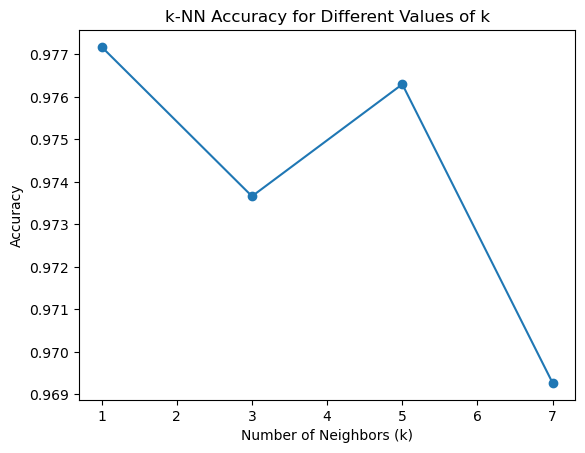

In [40]:
# Initialize lists to store k values and corresponding accuracies
k_values = [1, 3, 5, 7]
accuracies = []

# Try k-NN with different values of k
for k in k_values:
    # Create k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn_classifier.fit(X_train_tfidf, y_train)
    
    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test_tfidf)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.title('k-NN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [ ]:
pipe = make_pipeline(cv, nb)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have accuracy values for SVM, k-NN, and Naive Bayes
# Replace these values with your actual accuracy results
accuracy_svm = 0.994
accuracy_knn = 0.876
accuracy_nb = 0.991

# List of algorithms and their corresponding accuracy values
algorithms = ['SVM', 'k-NN', 'Naive Bayes']
accuracies = [accuracy_svm, accuracy_knn, accuracy_nb]

# Plotting the bar plot
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Setting y-axis limits (accuracy is between 0 and 1)
plt.title('Accuracy Comparison of Email Spam Classification Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

In [ ]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))